<a href="https://colab.research.google.com/github/surajghuwalewala/CE888_Data_Science_and_Decision_Making/blob/master/Lab_4/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

%matplotlib inline

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix


- Loading the bank data


In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv", delimiter = ";")

In [3]:
df = df.dropna()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform)


In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
# One hot encoding the data
df_dummies = pd.get_dummies(df, columns=['y'])

In [7]:
df_dummies.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_no,y_yes
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1,0


In [0]:
# Dropping the y_no column
df_dummies.drop(['y_no', 'duration'], axis=1, inplace=True)

In [9]:
df_dummies.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_yes
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


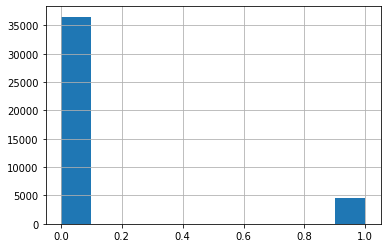

In [10]:
df_dummies['y_yes'].hist()

In [0]:
#Separating features and labels
features = df_dummies.drop(['y_yes'], axis=1)
labels = df_dummies['y_yes']

In [0]:
feature_cols = features.columns

In [0]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
def feature_imp(clf, X, features):
  importances = clf.feature_importances_
  std = np.std([tree.feature_importances_ for tree in clf.estimators_],
              axis=0)
  indices = np.argsort(importances)[::-1]
  print(indices)
  
  # Plot the feature importances of the forest
  fig = plt.figure()
  plt.title("Feature importances")
  plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
  plt.xticks(range(X.shape[1]), np.array(features)[indices])
  plt.xlim([-1, X.shape[1]])
  fig.set_size_inches(15,8)
  axes = plt.gca()
  axes.set_ylim([0,None])


In [0]:
def evaluateResults(y_pred, y_test):
  # Scoring metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  kappa = cohen_kappa_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print("Accuracy\t: ", accuracy)
  print("Precision\t: ", precision)
  print("Recall\t\t: ", recall)
  print("Kappa Score\t: ", kappa)
  print("F1 Score\t: ", f1)
  print("\n-------------------------------------------- \n")

  # Compute confusion matrix
  cnf_matrix = confusion_matrix(y_test, y_pred)
  np.set_printoptions(precision=2)

  # Plot non-normalized confusion matrix
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=range(len(set(y_test))), normalize = True,
                        title='Confusion matrix')

# Implementing ExtraTreesClassifier

In [17]:
# Defining a ExtraTreesClassifier
treeClassifier = ExtraTreesClassifier(n_jobs=-1, random_state=42)

# Setting parameter ranges for GridSearchCV
params = {'n_estimators': np.arange(10,130,15)}#, 'criterion':['gini', 'entropy'], 'min_samples_split':np.arange(2,5)}#, 'max_features':['sqrt', 'log2'], }

# Defining the GridSearchCV for parameter tuning
clf = GridSearchCV(treeClassifier, params, cv=10 ) #cv=10 means 10-fold cross validation

# Fitting the train data on the classifier
clf.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated',

In [0]:
# Select the best estimator
model = clf.best_estimator_

# predict on test set
y_pred = model.predict(X_test)

Accuracy	:  0.8862588006797767
Precision	:  0.4982698961937716
Recall		:  0.30802139037433157
Kappa Score	:  0.3218969231415255
F1 Score	:  0.3807005948446795

-------------------------------------------- 

Normalized confusion matrix
[ 0 17 10  1  3 11  9 18  2  5 14  6 13 16 15  8  7 12  4]


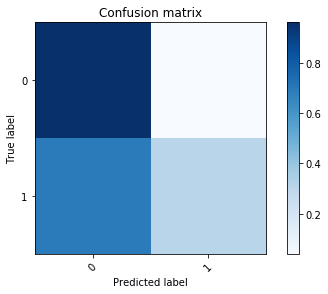

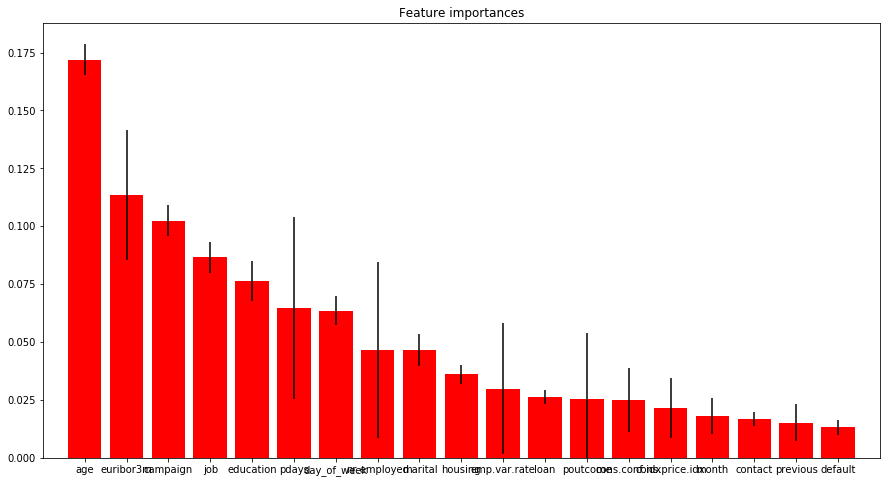

In [19]:
# Evaluation
evaluateResults(y_pred, y_test)
feature_imp(model, X_test,feature_cols)

# Implementing Dummy classifier

In [20]:
# Setting dummy classifier
clf = DummyClassifier()

#Fitting training data into classifier
clf.fit(X_train, y_train)

#prediction on test set
y_pred = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Accuracy	:  0.798130614226754
Precision	:  0.1052060737527115
Recall		:  0.10374331550802139
Kappa Score	:  -0.009280213257485403
F1 Score	:  0.10446957458266021

-------------------------------------------- 

Normalized confusion matrix


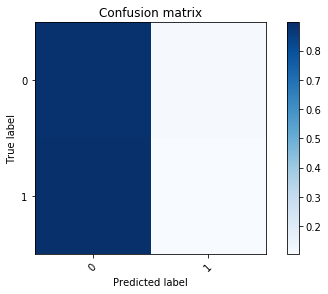

In [21]:
# Evaluation
evaluateResults(y_pred, y_test)


# Implementing Random Forest Classifier

In [0]:
randomForestClassifier = RandomForestClassifier(n_jobs=-1, random_state=42)
params = {}


# Defining the GridSearchCV for parameter tuning
clf = GridSearchCV(randomForestClassifier, params, cv=10 ) #cv=10 means 10-fold cross validation

# Fitting the train data on the classifier
clf.fit(X_train, y_train)

# Select the best estimator
model = clf.best_estimator_

# predict on test set
y_pred = model.predict(X_test)

Accuracy	:  0.891964068948774
Precision	:  0.5445544554455446
Recall		:  0.29411764705882354
Kappa Score	:  0.32848767718991023
F1 Score	:  0.3819444444444444

-------------------------------------------- 

Normalized confusion matrix
[ 0 17  1 10  3  9 18 11  2  5 13  6 16 14 15  8 12  7  4]


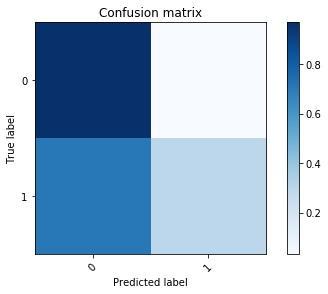

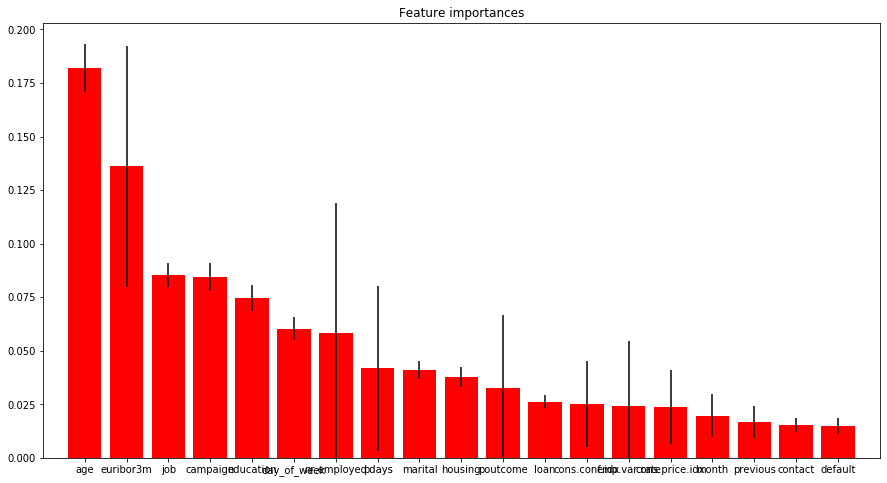

In [23]:
# Evaluation
evaluateResults(y_pred, y_test)
feature_imp(model, X_test,feature_cols)